In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, f1_score

## Exploratory Data Analysis (EDA)

In [ ]:
file_link = 'https://drive.google.com/file/d/1dNS4adVkQ05MTNUyAMG-oEnA-fpruShc/view?usp=sharing' # the file access must have to be Public
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
print(new_link)
df = pd.read_csv(new_link)

https://drive.google.com/uc?id=1dNS4adVkQ05MTNUyAMG-oEnA-fpruShc


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Field of Study', 'Current Occupation', 'Gender', 'Education Level', 'Industry Growth Rate', 'Family Influence']
Numerical Variables:
['Age', 'Years of Experience', 'Job Satisfaction', 'Work-Life Balance', 'Job Opportunities', 'Salary', 'Job Security', 'Career Change Interest', 'Skills Gap', 'Mentorship Available', 'Certifications', 'Freelancing Experience', 'Geographic Mobility', 'Professional Networks', 'Career Change Events', 'Technology Adoption', 'Likely to Change Occupation']


In [ ]:
print(df.head())
print(df.info())
df.shape

  Field of Study Current Occupation  Age  Gender  Years of Experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High                 7                 10   
1        Master's                  Low                10                  3   
2        Master's                  Low                 8                  3   
3             PhD               Medium                 7                  9   
4             PhD                  Low                 3                  1   

   Job Opportunities  ...  Skills Gap  Family Influence  Mentorship Available  \
0    

(38444, 23)

In [ ]:
df.head(20)

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1
5,Medicine,Lawyer,56,Male,39,Bachelor's,Low,3,1,99,...,10,Medium,1,0,0,0,10,0,3,1
6,Medicine,Software Developer,51,Female,29,High School,Low,7,4,13,...,6,High,1,1,0,1,4,1,10,0
7,Medicine,Artist,58,Female,32,High School,High,9,4,77,...,8,Medium,0,0,0,0,6,0,4,0
8,Computer Science,Software Developer,31,Female,38,Bachelor's,Low,1,5,56,...,6,Medium,0,1,0,0,10,1,7,1
9,Business,Doctor,30,Female,16,Master's,Medium,8,5,98,...,6,High,0,0,0,0,3,2,3,0


In [ ]:
df.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.299943,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.458239,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [ ]:
df.nunique()

,0
Field of Study,10
Current Occupation,10
Age,40
Gender,2
Years of Experience,40
Education Level,4
Industry Growth Rate,3
Job Satisfaction,10
Work-Life Balance,10
Job Opportunities,100


In [ ]:
df.isnull().sum()

,0
Field of Study,0
Current Occupation,0
Age,0
Gender,0
Years of Experience,0
Education Level,0
Industry Growth Rate,0
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0


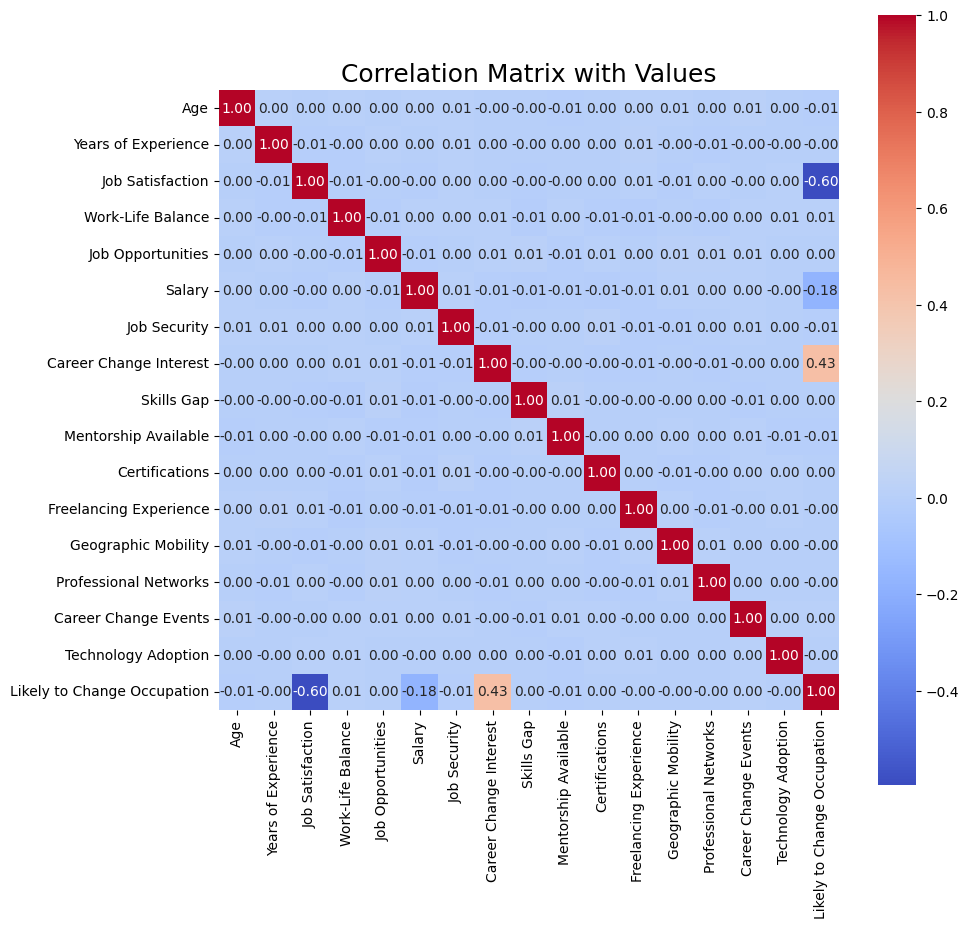

In [ ]:
import seaborn as sns
# Correlation matrix plot
plt.figure(figsize=(10,10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',square=True,cbar=True)
plt.title('Correlation Matrix with Values', fontsize=18)
plt.show()

In [ ]:
most_used = df.mode().iloc[0]
print("Most used values for each column:")
print(most_used)

Most used values for each column:
Field of Study                           Medicine
Current Occupation             Software Developer
Age                                          24.0
Gender                                     Female
Years of Experience                          30.0
Education Level                               PhD
Industry Growth Rate                         High
Job Satisfaction                              6.0
Work-Life Balance                            10.0
Job Opportunities                            85.0
Salary                                      46508
Job Security                                  1.0
Career Change Interest                        0.0
Skills Gap                                    5.0
Family Influence                             High
Mentorship Available                          0.0
Certifications                                0.0
Freelancing Experience                        0.0
Geographic Mobility                           0.0
Professional Net

In [ ]:
column_names=list(df.columns)
print("2nd Most used values for each column:")
for i, column_name in enumerate(column_names, start=1):
  c = df[column_name].value_counts()
  second_most_common = c.index[1]
  second_count = c.iloc[1]
  print(f"{i}. {column_name} → {second_most_common} ({second_count})")

2nd Most used values for each column:
1. Field of Study → Business (3921)
2. Current Occupation → Psychologist (3890)
3. Age → 55 (1026)
4. Gender → Male (19145)
5. Years of Experience → 39 (996)
6. Education Level → High School (9623)
7. Industry Growth Rate → Medium (12884)
8. Job Satisfaction → 1 (3898)
9. Work-Life Balance → 6 (3892)
10. Job Opportunities → 86 (422)
11. Salary → 193088 (5)
12. Job Security → 3 (3889)
13. Career Change Interest → 1 (7685)
14. Skills Gap → 7 (3916)
15. Family Influence → Medium (9618)
16. Mentorship Available → 1 (11531)
17. Certifications → 1 (11480)
18. Freelancing Experience → 1 (5736)
19. Geographic Mobility → 1 (11686)
20. Professional Networks → 5 (3922)
21. Career Change Events → 1 (12849)
22. Technology Adoption → 5 (3894)
23. Likely to Change Occupation → 0 (16279)


Likely to Change Occupation
1    22165
0    16279
Name: count, dtype: int64


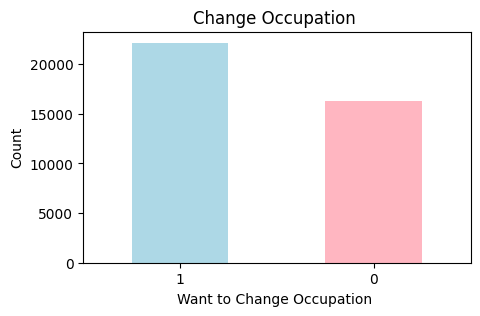

In [ ]:
print(df['Likely to Change Occupation'].value_counts())
plt.figure(figsize=(5, 3))
df['Likely to Change Occupation'].value_counts().plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title("Change Occupation ")
plt.xlabel('Want to Change Occupation ')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

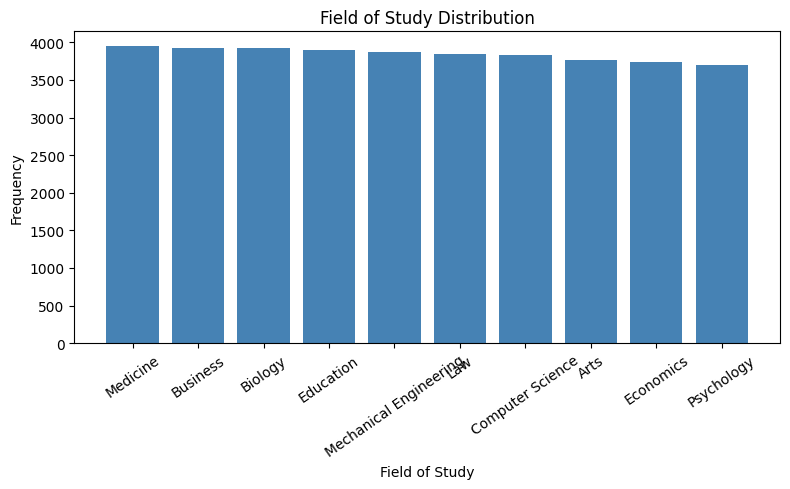

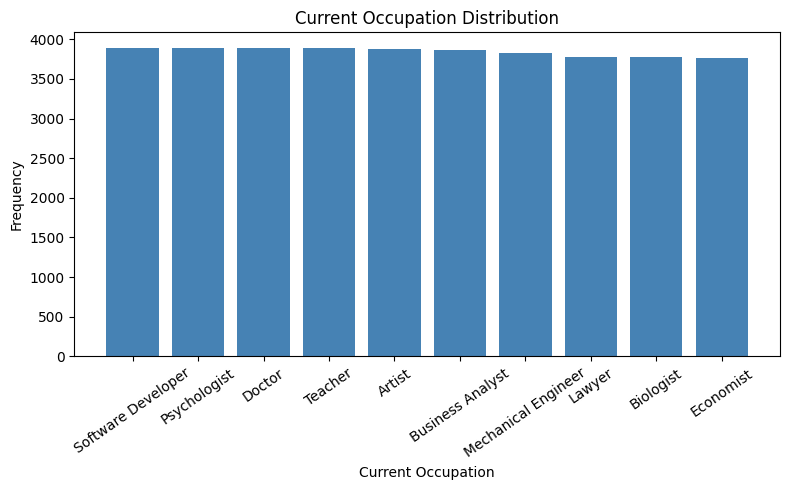

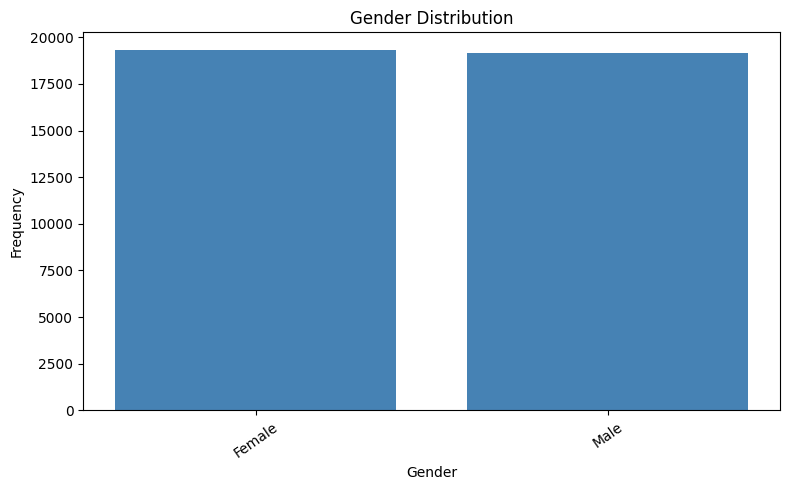

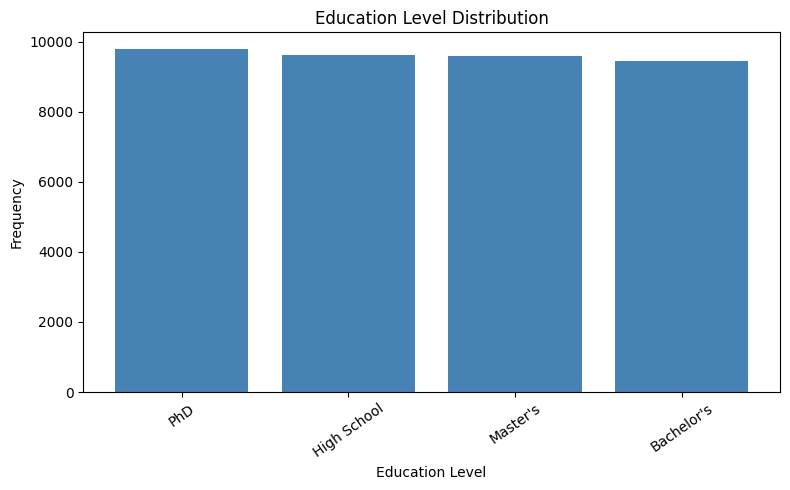

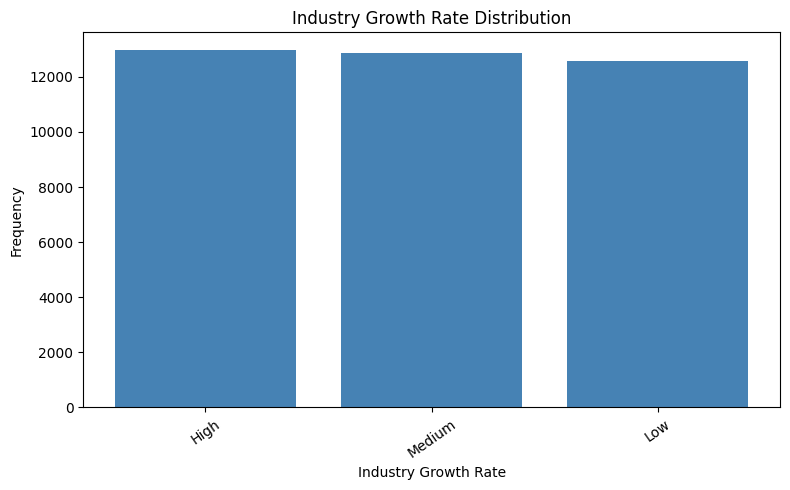

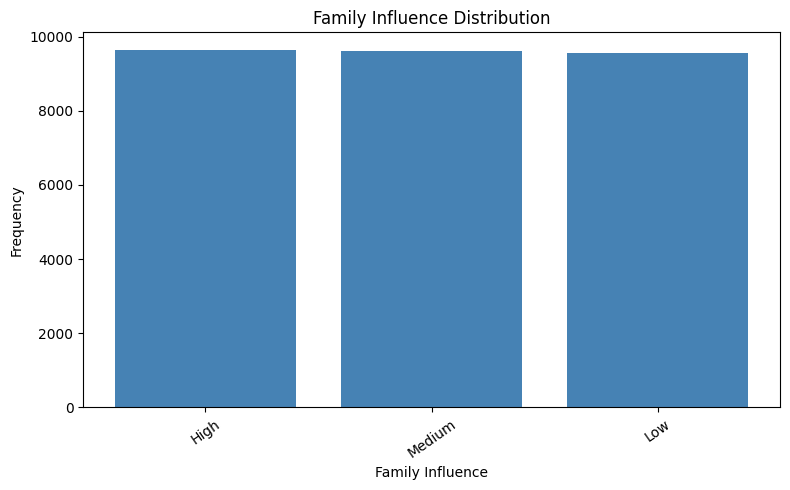

In [ ]:
Categorical_Variables=['Field of Study', 'Current Occupation', 'Gender', 'Education Level', 'Industry Growth Rate', 'Family Influence']

for value in Categorical_Variables:
    counts = df[value].value_counts()
    plt.figure(figsize=(8,5))
    plt.bar(counts.index.astype(str), counts.values)
    plt.bar(counts.index.astype(str), counts.values, color='steelblue')
    plt.title(f"{value} Distribution")
    plt.xlabel(value)
    plt.ylabel("Frequency")
    plt.xticks(rotation=35)
    plt.tight_layout()
    plt.show()

Career Change Interest
0    30759
1     7685
Name: count, dtype: int64


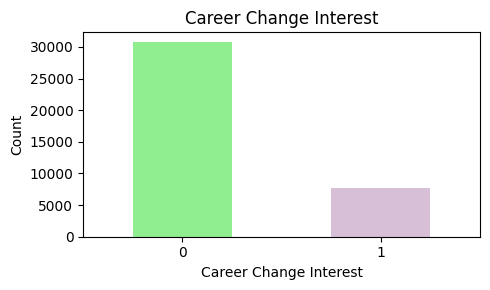

Mentorship Available
0    26913
1    11531
Name: count, dtype: int64


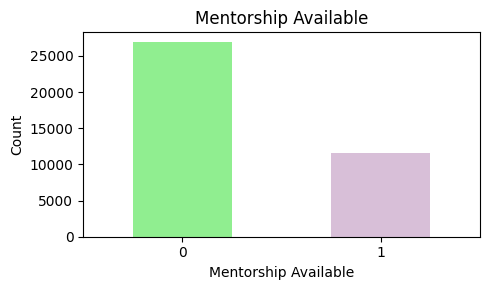

Certifications
0    26964
1    11480
Name: count, dtype: int64


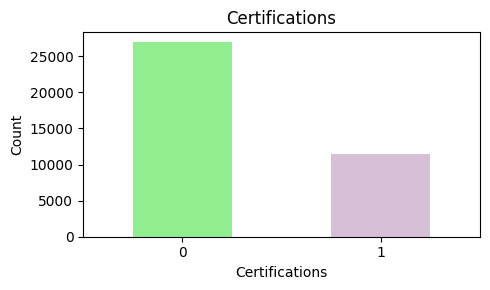

Freelancing Experience
0    32708
1     5736
Name: count, dtype: int64


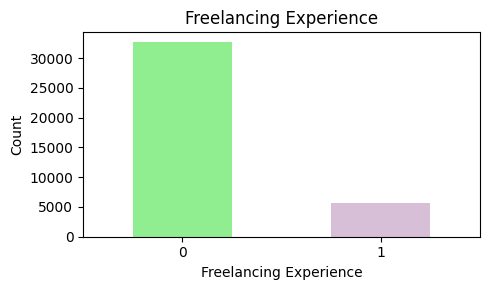

Geographic Mobility
0    26758
1    11686
Name: count, dtype: int64


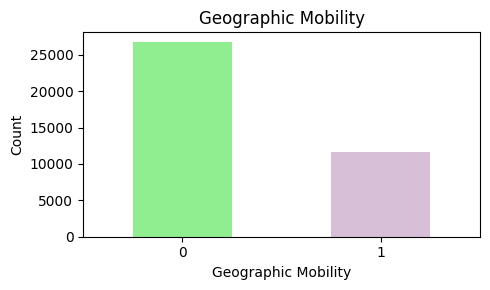

Career Change Events
2    12861
1    12849
0    12734
Name: count, dtype: int64


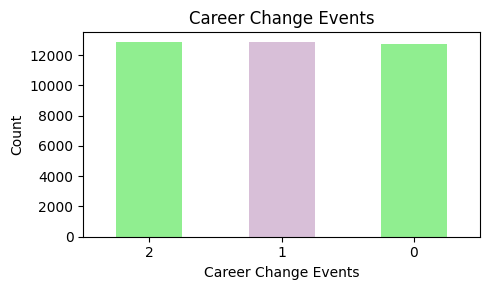

In [ ]:
binary_vars = ['Career Change Interest','Mentorship Available', 'Certifications','Freelancing Experience', 'Geographic Mobility', 'Career Change Events']
for col in binary_vars:
    print(df[col].value_counts())
    plt.figure(figsize=(5, 3))
    df[col].value_counts().plot( kind='bar',color=['lightgreen', '#D8BFD8'])
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

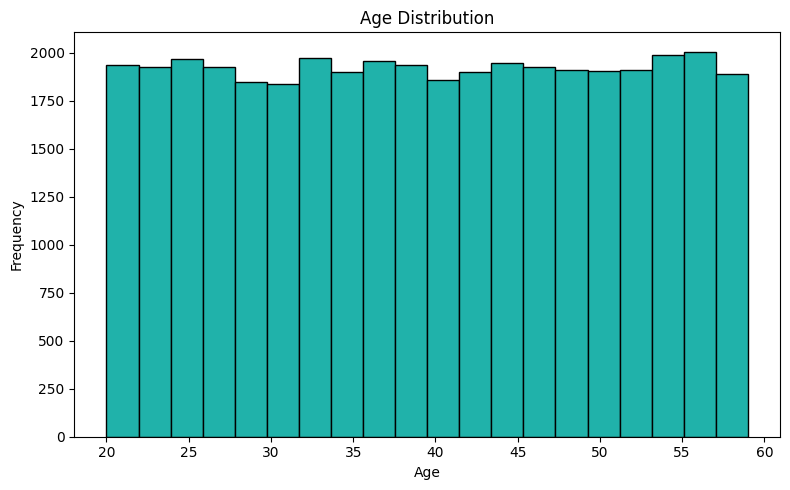

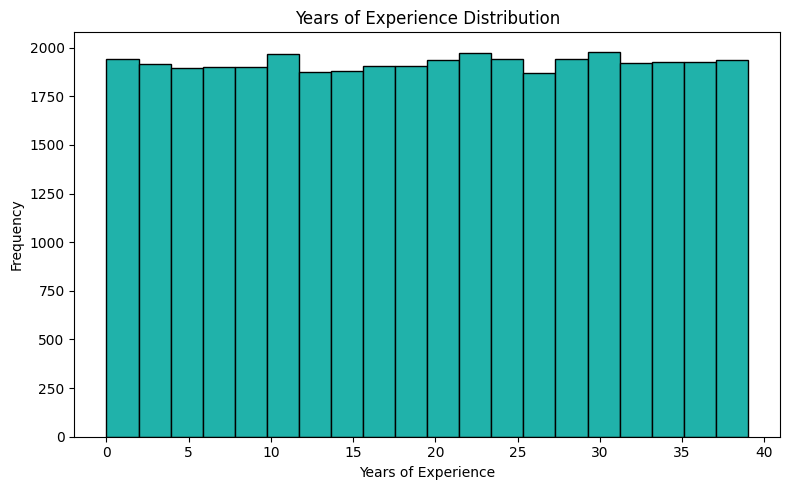

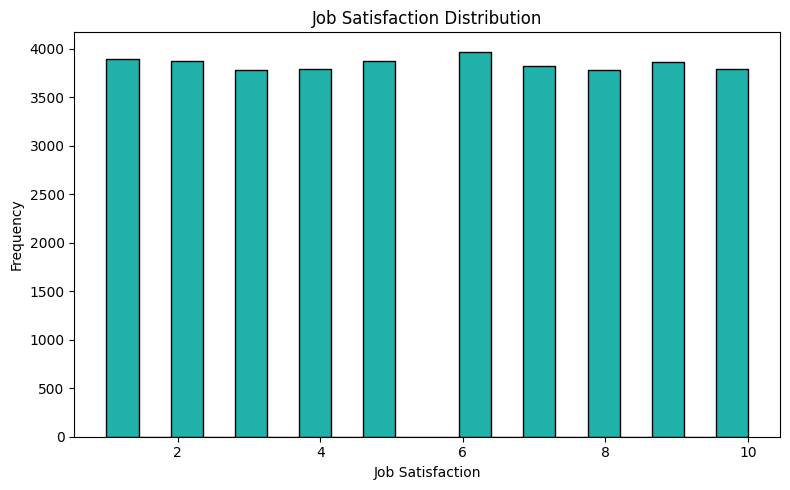

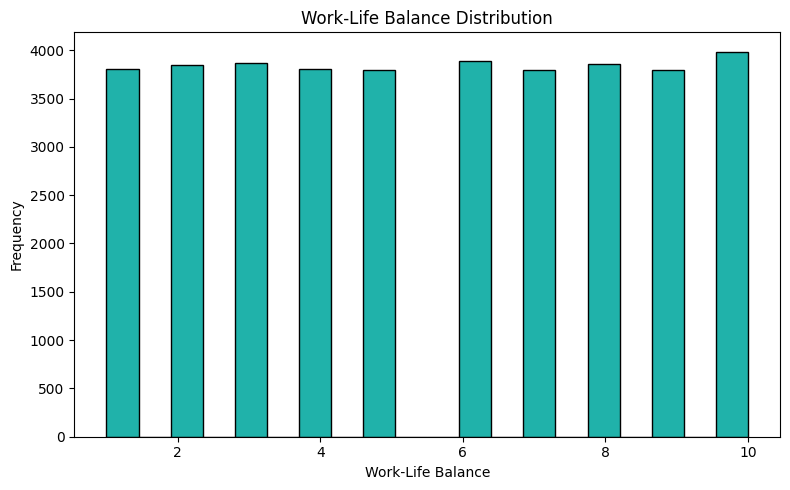

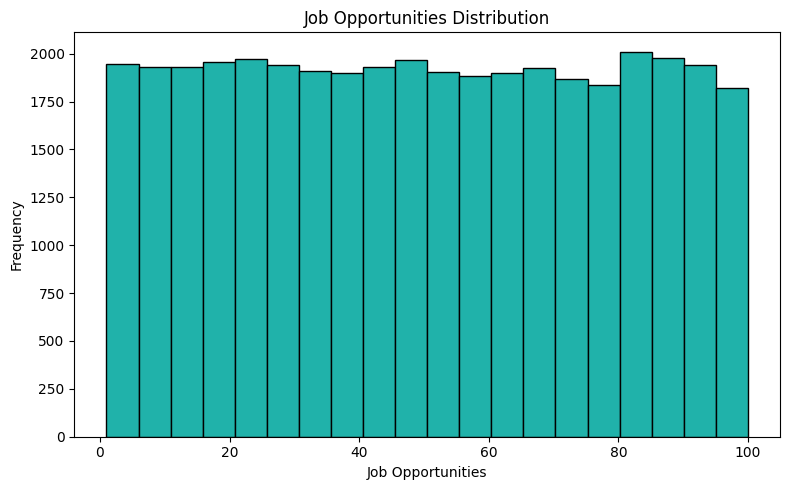

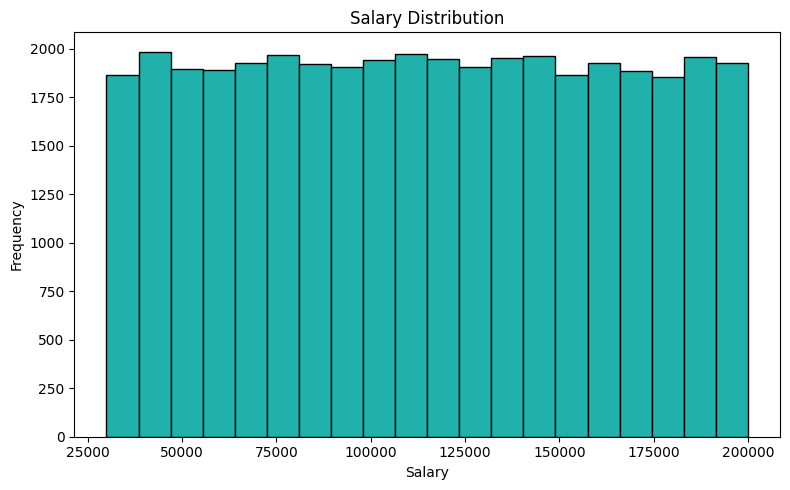

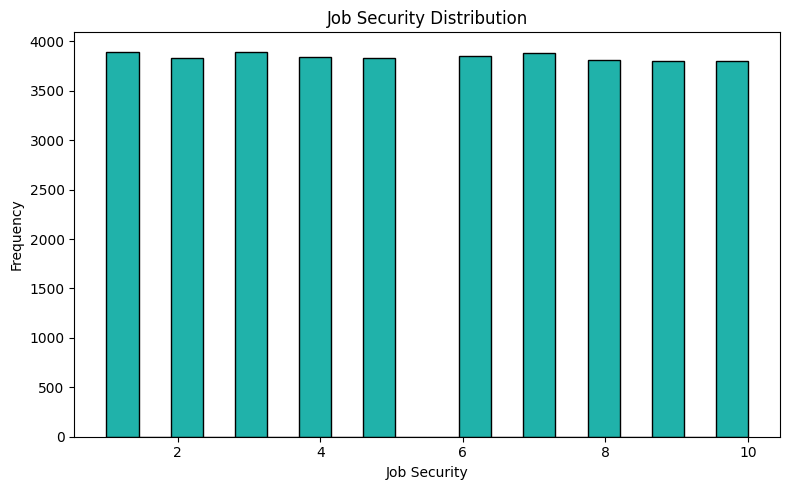

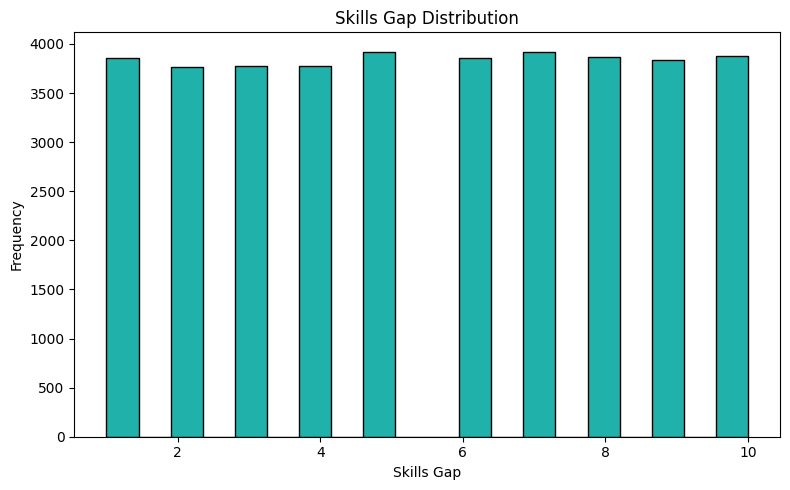

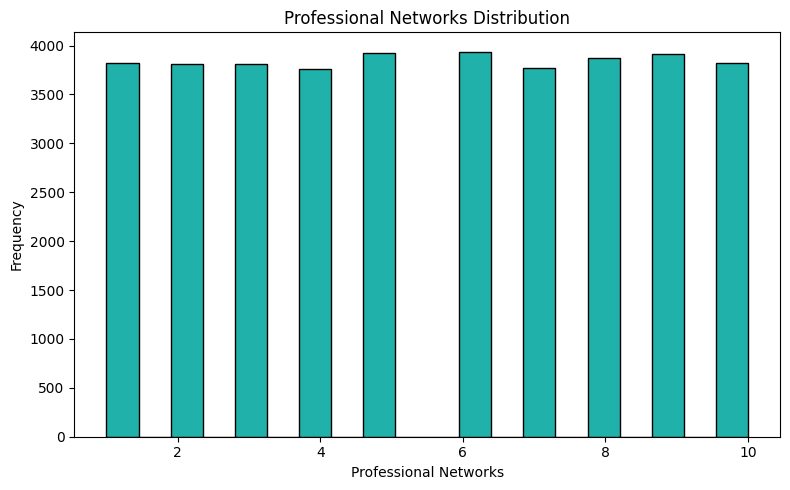

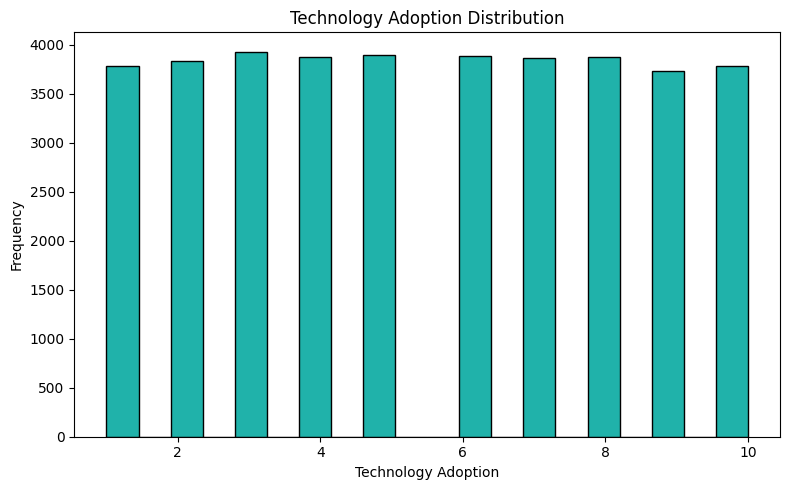

In [ ]:
Numerical_Variables = ['Age', 'Years of Experience', 'Job Satisfaction', 'Work-Life Balance','Job Opportunities', 'Salary', 'Job Security','Skills Gap', 'Professional Networks', 'Technology Adoption']

for element in Numerical_Variables:
    plt.figure(figsize=(8,5))
    plt.hist(df[element], bins=20, color='#20B2AA', edgecolor='black')
    plt.title(f"{element} Distribution")
    plt.xlabel(element)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


## Data Prepocessing

In [ ]:
df["Family Influence"] = df["Family Influence"].fillna("Did not answer")

In [ ]:
cat_columns = ['Field of Study', 'Current Occupation', 'Gender', 'Education Level', 'Industry Growth Rate', 'Family Influence']
df_new = pd.get_dummies(df, columns=cat_columns, drop_first=True)

In [ ]:
num_cols = ['Age', 'Years of Experience', 'Job Satisfaction', 'Work-Life Balance', 'Job Opportunities', 'Salary', 'Job Security', 'Skills Gap', 'Mentorship Available', 'Certifications', 'Freelancing Experience', 'Geographic Mobility', 'Professional Networks', 'Career Change Events', 'Technology Adoption']

In [ ]:
X = df_new[num_cols + [col for col in df_new.columns if col.startswith(tuple(cat_columns))]]
y = df_new['Likely to Change Occupation']

In [ ]:
from sklearn.model_selection import train_test_split
# splits
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (24604, 42), Val: (6151, 42), Test: (7689, 42)


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include=[np.number]).fillna(0)
X_val_num = X_val.select_dtypes(include=[np.number]).fillna(0)
X_test_num = X_test.select_dtypes(include=[np.number]).fillna(0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_val_scaled = scaler.transform(X_val_num)
X_test_scaled = scaler.transform(X_test_num)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

numeric_cols = X_train_num.columns
selected_features = numeric_cols[selector.get_support()]
print("Top 10 features selected:", list(selected_features))
print("Top 10 features selected (indices):", selector.get_support(indices=True))


Top 10 features selected: ['Age', 'Job Satisfaction', 'Work-Life Balance', 'Salary', 'Job Security', 'Mentorship Available', 'Certifications', 'Geographic Mobility', 'Professional Networks', 'Career Change Events']
Top 10 features selected (indices): [ 0  2  3  5  6  8  9 11 12 13]


# Implementing model

In [ ]:
results = []

In [ ]:
lr = LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_lr = cross_validate(lr, X_train_selected, y_train,cv=skf,scoring={"accuracy": "accuracy", "roc_auc": "roc_auc"})
print("\n--- Logistic Regression CV ---")
print(f"CV Accuracy: {cv_lr['test_accuracy'].mean():.3f}")
print(f"CV ROC-AUC : {cv_lr['test_roc_auc'].mean():.3f}")
model_lr_eval = LogisticRegression(max_iter=1000)
model_lr_eval.fit(X_train_selected, y_train)
y_pred_lr_eval = model_lr_eval.predict(X_test_selected)
y_proba_lr_eval = model_lr_eval.predict_proba(X_test_selected)[:, 1]
print("\n--- Logistic Regression Test Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_eval))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_eval))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_eval))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lr_eval):.3f}")
results.append({"Model": "Logistic Regression","Accuracy": accuracy_score(y_test, y_pred_lr_eval),"Precision": precision_score(y_test, y_pred_lr_eval),"Recall": recall_score(y_test, y_pred_lr_eval),"F1": f1_score(y_test, y_pred_lr_eval),"ROC-AUC": roc_auc_score(y_test, y_proba_lr_eval)})


--- Logistic Regression CV ---
CV Accuracy: 0.797
CV ROC-AUC : 0.867

--- Logistic Regression Test Metrics ---
Accuracy: 0.7753934191702432
Confusion Matrix:
[[2315  941]
 [ 786 3647]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      3256
           1       0.79      0.82      0.81      4433

    accuracy                           0.78      7689
   macro avg       0.77      0.77      0.77      7689
weighted avg       0.77      0.78      0.77      7689

ROC-AUC: 0.872



--- Random Forest CV Results ---
CV Accuracy: 0.893 ± 0.006
CV ROC-AUC : 0.908
Random Forest Classifier Accuracy: 0.8945246455976069
Random Forest Classifier - Confusion Matrix:
[[3255    1]
 [ 810 3623]]
Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3256
           1       1.00      0.82      0.90      4433

    accuracy                           0.89      7689
   macro avg       0.90      0.91      0.89      7689
weighted avg       0.92      0.89      0.90      7689

Random Forest Classifier - ROC-AUC Score: 0.907


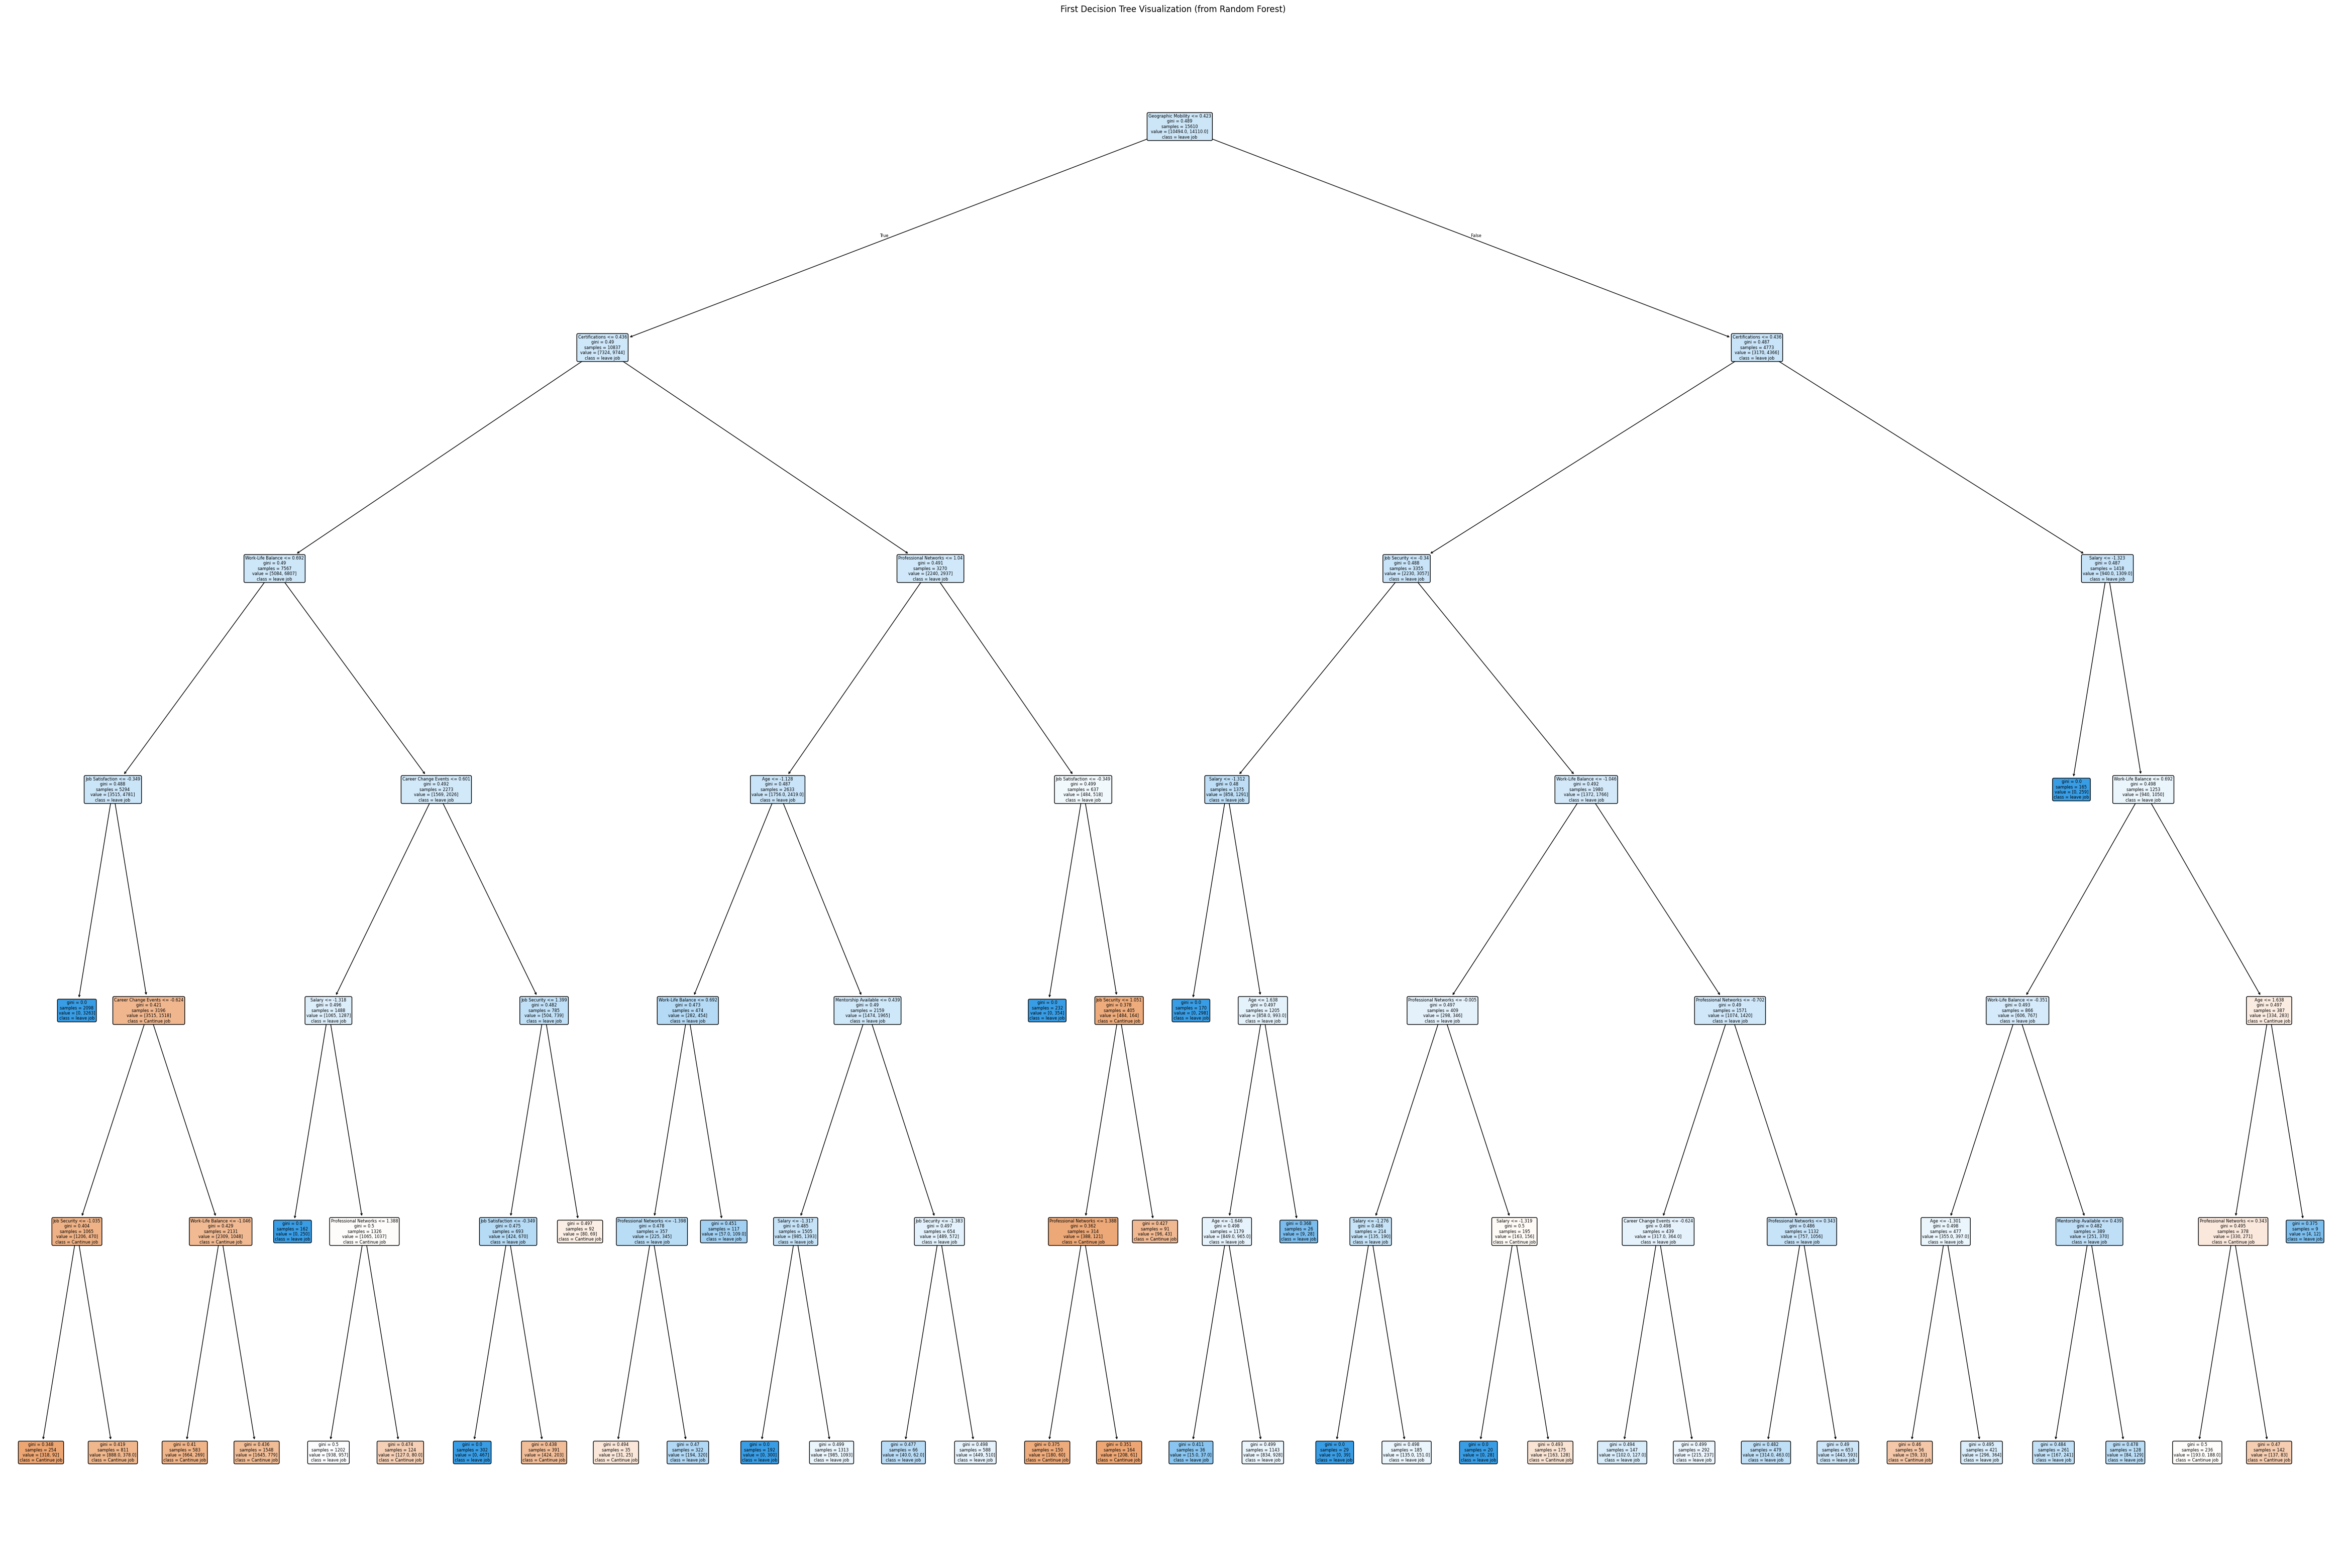

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 6, criterion='gini',min_samples_split=150, max_features=0.05,bootstrap=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_rf = cross_validate(random_forest_model,X_train_selected,y_train,cv=skf,scoring={"accuracy": "accuracy", "roc_auc": "roc_auc"})
print("\n--- Random Forest CV Results ---")
print(f"CV Accuracy: {cv_rf['test_accuracy'].mean():.3f} ± {cv_rf['test_accuracy'].std():.3f}")
print(f"CV ROC-AUC : {cv_rf['test_roc_auc'].mean():.3f}")
random_forest_model.fit(X_train_selected, y_train)
y_pred_rf = random_forest_model.predict(X_test_selected)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))
y_proba_rf_eval = random_forest_model.predict_proba(X_test_selected)[:, 1]
print(f"Random Forest Classifier - ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf_eval):.3f}")
plt.figure(figsize=(60, 40))
plot_tree(random_forest_model.estimators_[0], feature_names=selected_features, class_names=['Cantinue job', 'leave job'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()
results.append({"Model": "Random Forest","Accuracy": accuracy_score(y_test, y_pred_rf),"Precision": precision_score(y_test, y_pred_rf),"Recall": recall_score(y_test, y_pred_rf),"F1": f1_score(y_test, y_pred_rf),"ROC-AUC": roc_auc_score(y_test, y_proba_rf_eval)})

In [ ]:
abc = AdaBoostClassifier(n_estimators=30,learning_rate=0.1, random_state = 42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_abc = cross_validate(abc,X_train_selected,y_train,cv=skf,scoring={"accuracy": "accuracy", "roc_auc": "roc_auc"})
print("\n--- AdaBoost CV Results ---")
print(f"CV Accuracy: {cv_abc['test_accuracy'].mean():.3f} ± {cv_abc['test_accuracy'].std():.3f}")
print(f"CV ROC-AUC : {cv_abc['test_roc_auc'].mean():.3f}")
model = abc.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train_selected, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test_selected, y_test)))
print("AdaBoost Classifier - Accuracy:", accuracy_score(y_test, y_pred))
print("\nAdaBoost Classifier - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAdaBoost Classifier - Classification Report:")
print(classification_report(y_test, y_pred))
y_proba_abc_eval = abc.predict_proba(X_test_selected)[:, 1]
print(f"AdaBoost Classifier - ROC-AUC Score: {roc_auc_score(y_test, y_proba_abc_eval):.3f}")
results.append({"Model": "AdaBoost","Accuracy": accuracy_score(y_test, y_pred),"Precision": precision_score(y_test, y_pred),"Recall": recall_score(y_test, y_pred),"F1": f1_score(y_test, y_pred),"ROC-AUC": roc_auc_score(y_test, y_proba_abc_eval)})


--- AdaBoost CV Results ---
CV Accuracy: 0.821 ± 0.006
CV ROC-AUC : 0.845
Accuracy score (training): 0.821
Accuracy score (validation): 0.831
AdaBoost Classifier - Accuracy: 0.8311874105865522

AdaBoost Classifier - Confusion Matrix:
[[3256    0]
 [1298 3135]]

AdaBoost Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      3256
           1       1.00      0.71      0.83      4433

    accuracy                           0.83      7689
   macro avg       0.86      0.85      0.83      7689
weighted avg       0.88      0.83      0.83      7689

AdaBoost Classifier - ROC-AUC Score: 0.854


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7292 - loss: 0.5027 - val_accuracy: 0.8577 - val_loss: 0.3387
Epoch 2/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8411 - loss: 0.3508 - val_accuracy: 0.8662 - val_loss: 0.3074
Epoch 3/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8609 - loss: 0.3175 - val_accuracy: 0.8789 - val_loss: 0.2956
Epoch 4/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8718 - loss: 0.3045 - val_accuracy: 0.8803 - val_loss: 0.2874
Epoch 5/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8766 - loss: 0.2959 - val_accuracy: 0.8805 - val_loss: 0.2862
Epoch 6/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8804 - loss: 0.2902 - val_accuracy: 0.8842 - val_loss: 0.2810
Epoch 7/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8827 - loss: 0.2853 - val_accuracy: 0.8847 - val_loss: 0.2788
Epoch 8/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8825 - loss: 0.2849 - val_accurac

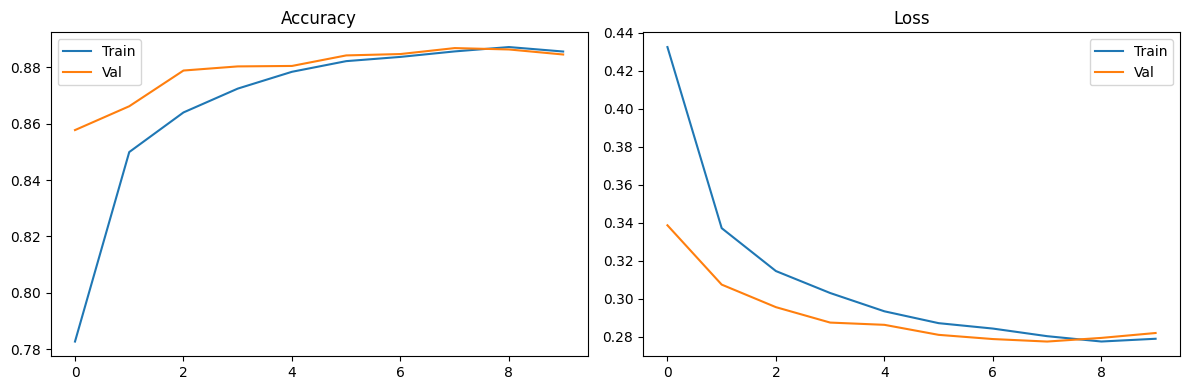

In [ ]:
# MODEL
model = Sequential([Dense(64, activation='relu', input_shape=(10,)),Dropout(0.3),Dense(32, activation='relu'), Dropout(0.3),Dense(16, activation='relu'),Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
#TRAIN
history = model.fit(X_train_selected, y_train,validation_data=(X_val_selected, y_val),epochs=10,batch_size=32,verbose=1)
#DIAGNOSTICS
train_acc = max(history.history['accuracy'])
val_acc = max(history.history['val_accuracy'])
print(f"\n=== RESULTS ===")
print(f"Max Train Acc: {train_acc:.3f}")
print(f"Max Val Acc: {val_acc:.3f}")
print(f"GAP: {train_acc - val_acc:.3f}")
if train_acc - val_acc > 0.1:
    print("OVERFITTING - Good progress!")
elif train_acc < 0.75:
    print("UNDERFITTING")
else:
    print("Good fit!")
y_pred_nn = (model.predict(X_test_selected) > 0.5).astype(int).ravel()
y_proba_nn = model.predict(X_test_selected).ravel()

results.append({"Model": "Neural Network","Accuracy": accuracy_score(y_test, y_pred_nn),"Precision": precision_score(y_test, y_pred_nn),"Recall": recall_score(y_test, y_pred_nn),"F1": f1_score(y_test, y_pred_nn),"ROC-AUC": roc_auc_score(y_test, y_proba_nn)})
#PLOT
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.775393   0.794900  0.822693  0.808558  0.872039
1        Random Forest  0.894525   0.999724  0.817279  0.899342  0.907350
2             AdaBoost  0.831187   1.000000  0.707196  0.828488  0.853598
3       Neural Network  0.891533   0.988862  0.821114  0.897215  0.912179


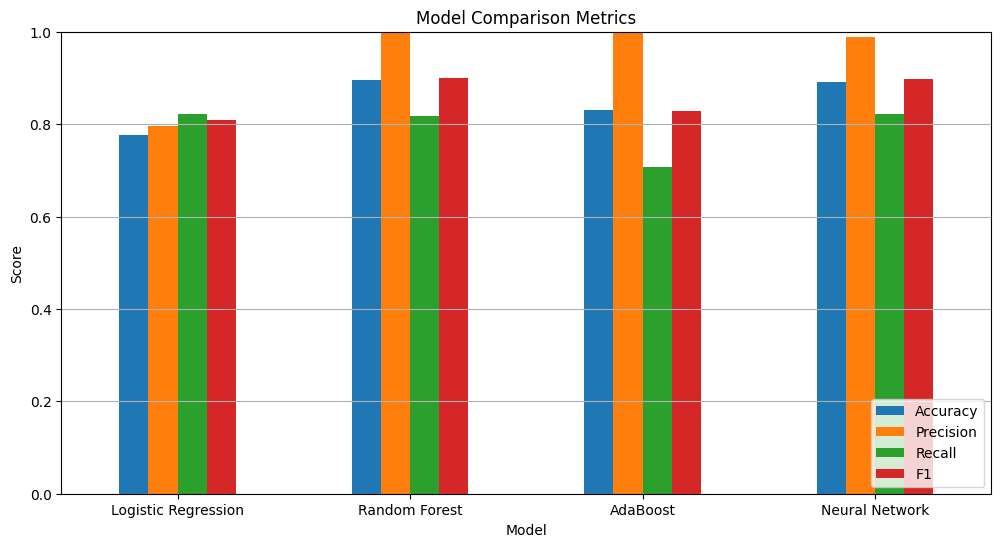

In [ ]:
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1"]].plot(kind="bar",figsize=(12, 6))
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.legend(loc="lower right")
plt.show()

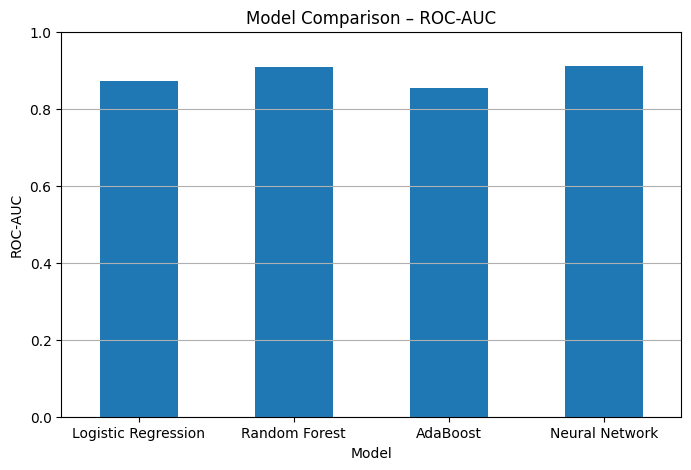

In [ ]:
results_df.set_index("Model")["ROC-AUC"].plot(kind="bar",figsize=(8, 5))
plt.title("Model Comparison – ROC-AUC")
plt.ylabel("ROC-AUC")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()